In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Purchase.csv")

In [3]:
df.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


In [4]:
df.shape

(260753, 299)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Columns: 299 entries, QuoteNumber to GeographicField64
dtypes: float64(6), int64(265), object(28)
memory usage: 594.8+ MB


In [6]:
df.QuoteConversion_Flag.value_counts()

0    211859
1     48894
Name: QuoteConversion_Flag, dtype: int64

In [7]:
48894/(48894+211859)

0.1875107860695754

In [8]:
df['Date'] = pd.to_datetime(pd.Series(df['Original_Quote_Date']))

In [9]:
df = df.drop(["Original_Quote_Date","QuoteNumber" ], axis=1)

In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [11]:
df = df.drop(["Date"], axis=1)

In [12]:
df.shape

(260753, 299)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
QuoteConversion_Flag,260753.0,0.187511,0.390322,0.0000,0.0000,0.0000,0.0000,1.0000
Field6,260753.0,3.679823,2.184370,0.0000,1.0000,5.0000,5.0000,7.0000
Field7,260753.0,18.293339,7.382803,1.0000,11.0000,23.0000,24.0000,28.0000
Field8,260753.0,0.938346,0.037086,0.8746,0.9153,0.9403,0.9685,1.0101
Field9,260753.0,0.001451,0.001486,0.0004,0.0006,0.0006,0.0038,0.0040
...,...,...,...,...,...,...,...,...
GeographicField62B,260753.0,14.122948,5.829091,-1.0000,8.0000,13.0000,19.0000,25.0000
GeographicField63,260753.0,1.023152,0.150438,0.0000,1.0000,1.0000,1.0000,2.0000
GeographicField64,260753.0,1.401108,1.210544,0.0000,0.0000,2.0000,2.0000,3.0000
Year,260753.0,2013.776532,0.726497,2013.0000,2013.0000,2014.0000,2014.0000,2015.0000


In [16]:
for f in df.columns:
    if df[f].dtype =='object':
        lbl = LabelEncoder()
        df[f] = lbl.fit_transform(list(df[f].values))
        

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Columns: 299 entries, QuoteConversion_Flag to Month
dtypes: float64(6), int64(293)
memory usage: 594.8 MB


In [18]:
df = df.fillna(-1)

In [22]:
target = df["QuoteConversion_Flag"]
x = df.drop(['QuoteConversion_Flag'], axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.25, random_state = 1234)

In [24]:
clf = xgb.XGBClassifier(n_estimators=100,
                        #eta = 0.01, 
                        learning_rate=0.1,
                        nthread=-1,
                        max_depth=12,
                        subsample=0.6,
                        colsample_bytree=0.6
)

In [25]:
X_val,X_test1,y_val, y_test1 = train_test_split(X_test,y_test, test_size=0.6, random_state = 1234) 

In [26]:
evalset = [(X_train,y_train),(X_val,y_val)]

In [27]:
xgb_model = clf.fit(X_train, y_train, eval_metric="error", eval_set=evalset  )

C:\Users\sci\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.08328	validation_1-error:0.09001
[1]	validation_0-error:0.08130	validation_1-error:0.08970
[2]	validation_0-error:0.08001	validation_1-error:0.09066
[3]	validation_0-error:0.07956	validation_1-error:0.09001
[4]	validation_0-error:0.07644	validation_1-error:0.08663
[5]	validation_0-error:0.07595	validation_1-error:0.08583
[6]	validation_0-error:0.07388	validation_1-error:0.08349
[7]	validation_0-error:0.07320	validation_1-error:0.08265
[8]	validation_0-error:0.07270	validation_1-error:0.08330
[9]	validation_0-error:0.07148	validation_1-error:0.08441
[10]	validation_0-error:0.07092	validation_1-error:0.08368
[11]	validation_0-error:0.07006	validation_1-error:0.08280
[12]	validation_0-error:0.06977	validation_1-error:0.08276
[13]	validation_0-error:0.06871	validation_1-error:0.08226
[14]	validation_0-error:0.06877	validation_1-error:0.08211
[15]	validation_0-error:0.06796	validation_1-error:0.08188
[16]	validation_0-error:0.06737	validation_1-error:0.08111
[17]	va

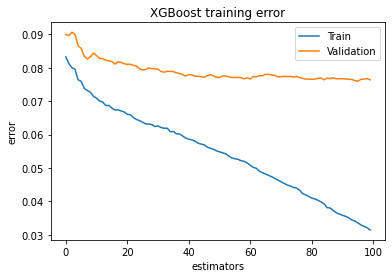

In [28]:
from matplotlib import pyplot 
results = clf.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Validation')
ax.legend()
pyplot.ylabel('error')
pyplot.xlabel('estimators')
pyplot.title('XGBoost training error')
pyplot.show()

In [29]:
pred = clf.predict(X_test1)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test1,pred ))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     31792
           1       0.88      0.69      0.78      7322

    accuracy                           0.93     39114
   macro avg       0.91      0.84      0.87     39114
weighted avg       0.92      0.93      0.92     39114



In [34]:
pred = clf.predict(X_test1, ntree_limit = 60)

In [35]:
print(classification_report(y_test1,pred ))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     31792
           1       0.89      0.69      0.78      7322

    accuracy                           0.93     39114
   macro avg       0.91      0.83      0.87     39114
weighted avg       0.92      0.93      0.92     39114



In [36]:
from sklearn.model_selection import KFold, cross_val_score
model = xgb.XGBClassifier(objective='binary:logistic',
    booster='gbtree',
    n_jobs= -1)
kfold = KFold(n_splits=4)
results = cross_val_score(model, X_train, y_train, cv=kfold, verbose = 2  )
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  21.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s remaining:    0.0s


[CV] END .................................................... total time=  22.6s
[CV] END .................................................... total time=  23.0s
[CV] END .................................................... total time=  22.0s
Accuracy: 92.52% (0.14%)


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min finished


In [37]:
results

array([0.92297151, 0.92689861, 0.92532368, 0.92548731])

In [40]:
prob = clf.predict_proba(X_test1)[:,1]

In [41]:
prob[0:10]

array([4.3034286e-04, 2.7705938e-02, 4.4488806e-01, 1.4031227e-02,
       9.9327117e-01, 3.4664024e-02, 1.6737512e-01, 2.7560774e-02,
       7.3353477e-02, 1.1648224e-04], dtype=float32)

In [42]:
X_test_res = X_test1

In [43]:
X_test_res['y_test'] = y_test

In [45]:
X_test_res['predicted_probability'] = prob

In [46]:
X_test_res = X_test_res.sort_values(by='predicted_probability', ascending=False)

In [47]:
X_test_res.head()

,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,...,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64,Year,Month,y_test,predicted_probability
193014,5,11,0.9919,0.0038,5,1.1886,0,8,14,9,...,-1,21,-1,13,1,2,2013,8,1,0.999842
89897,5,3,0.9023,0.0038,5,1.0670,0,9,15,9,...,-1,2,-1,21,1,2,2013,2,1,0.999834
177581,5,11,0.9919,0.0038,5,1.1886,0,7,11,7,...,-1,11,-1,8,1,2,2013,6,1,0.999814
176219,5,22,0.9893,0.0040,4,1.2433,0,5,8,5,...,-1,21,-1,24,1,2,2015,2,1,0.999813
103122,5,15,0.9313,0.0038,5,1.1161,0,12,20,12,...,-1,6,-1,17,1,2,2013,4,1,0.999811


In [48]:
X_test_res['decile_group'] = pd.qcut(X_test_res['predicted_probability'], 10)

In [49]:
lift = X_test_res.groupby('decile_group').agg( #Group by Deciles of Predicted Probabilties
[
    'count', #The total number of customers(data points) in the decile
    'sum', #The total number of bad customers(Risk=1)
]
)['y_test'].sort_index(ascending=False)
lift.columns = ['Number of Leads','Number of Purchases']
lift['Cumulative Purchases'] = lift['Number of Purchases'].cumsum() #Cumulative Sum of the number of bads
#Calculate Gain = Cumulative Percent of Events/Bads
lift['Percent of Events'] = lift['Number of Purchases']/lift['Number of Purchases'].sum()*100
lift['Gain'] = lift['Percent of Events'].cumsum() 
#Calculate Lift = Ratio of Bads to the number of data points in the decile
lift['Lift'] = lift['Gain']/np.array(range(10,100+10,10))
lift.head(10)

,Number of Leads,Number of Purchases,Cumulative Purchases,Percent of Events,Gain,Lift
decile_group,,,,,,
"(0.909, 1.0]",3912,3894,3894,53.182191,53.182191,5.318219
"(0.303, 0.909]",3911,2012,5906,27.478831,80.661022,4.033051
"(0.113, 0.303]",3911,874,6780,11.936629,92.597651,3.086588
"(0.0462, 0.113]",3912,336,7116,4.588910,97.186561,2.429664
"(0.0207, 0.0462]",3911,157,7273,2.144223,99.330784,1.986616
"(0.005, 0.0207]",3911,38,7311,0.518984,99.849768,1.664163
"(0.000549, 0.005]",3912,11,7322,0.150232,100.000000,1.428571
"(0.000289, 0.000549]",3911,0,7322,0.000000,100.000000,1.250000
"(0.000141, 0.000289]",3911,0,7322,0.000000,100.000000,1.111111


In [54]:
0.99/0.183

5.409836065573771

In [52]:
y_test1.value_counts()

0    31792
1     7322
Name: QuoteConversion_Flag, dtype: int64

In [55]:
lift = X_test_res.groupby('decile_group').agg( #Group by Deciles of Predicted Probabilties
[
    'count', #The total number of customers(data points) in the decile
    'sum', #The total number of bad customers(Risk=1)
]
)['y_test'].sort_index(ascending=False)

In [56]:
lift

,count,sum
decile_group,,
"(0.909, 1.0]",3912,3894
"(0.303, 0.909]",3911,2012
"(0.113, 0.303]",3911,874
"(0.0462, 0.113]",3912,336
"(0.0207, 0.0462]",3911,157
"(0.005, 0.0207]",3911,38
"(0.000549, 0.005]",3912,11
"(0.000289, 0.000549]",3911,0
"(0.000141, 0.000289]",3911,0


In [57]:
X_test_res['row_num'] = np.arange(1, X_test_res.shape[0]+1)

In [58]:
X_test_res.head()

,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,...,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64,Year,Month,y_test,predicted_probability,decile_group,row_num
193014,5,11,0.9919,0.0038,5,1.1886,0,8,14,9,...,-1,13,1,2,2013,8,1,0.999842,"(0.909, 1.0]",1
89897,5,3,0.9023,0.0038,5,1.0670,0,9,15,9,...,-1,21,1,2,2013,2,1,0.999834,"(0.909, 1.0]",2
177581,5,11,0.9919,0.0038,5,1.1886,0,7,11,7,...,-1,8,1,2,2013,6,1,0.999814,"(0.909, 1.0]",3
176219,5,22,0.9893,0.0040,4,1.2433,0,5,8,5,...,-1,24,1,2,2015,2,1,0.999813,"(0.909, 1.0]",4
103122,5,15,0.9313,0.0038,5,1.1161,0,12,20,12,...,-1,17,1,2,2013,4,1,0.999811,"(0.909, 1.0]",5


In [62]:
X_test_res['decile'] = 11 - np.ceil(X_test_res['row_num']/(X_test_res.shape[0]/10))

In [63]:
lift = X_test_res.groupby('decile').agg( #Group by Deciles of Predicted Probabilties
[
    'count', #The total number of customers(data points) in the decile
    'sum', #The total number of bad customers(Risk=1)
]
)['y_test'].sort_index(ascending=False)

In [64]:
lift

,count,sum
decile,,
10.0,3911,3893
9.0,3911,2013
8.0,3912,874
7.0,3911,336
6.0,3912,157
5.0,3911,38
4.0,3911,11
3.0,3912,0
2.0,3911,0


In [65]:
lift = X_test_res.groupby('decile').agg( #Group by Deciles of Predicted Probabilties
[
    'count', #The total number of customers(data points) in the decile
    'sum', #The total number of bad customers(Risk=1)
]
)['y_test'].sort_index(ascending=False)
lift.columns = ['Number of Leads','Number of Purchases']
lift['Cumulative Purchases'] = lift['Number of Purchases'].cumsum() #Cumulative Sum of the number of bads
#Calculate Gain = Cumulative Percent of Events/Bads
lift['Percent of Events'] = lift['Number of Purchases']/lift['Number of Purchases'].sum()*100
lift['Gain'] = lift['Percent of Events'].cumsum() 
#Calculate Lift = Ratio of Bads to the number of data points in the decile
lift['Lift'] = lift['Gain']/np.array(range(10,100+10,10))
lift.head(10)

,Number of Leads,Number of Purchases,Cumulative Purchases,Percent of Events,Gain,Lift
decile,,,,,,
10.0,3911,3893,3893,53.168533,53.168533,5.316853
9.0,3911,2013,5906,27.492488,80.661022,4.033051
8.0,3912,874,6780,11.936629,92.597651,3.086588
7.0,3911,336,7116,4.588910,97.186561,2.429664
6.0,3912,157,7273,2.144223,99.330784,1.986616
5.0,3911,38,7311,0.518984,99.849768,1.664163
4.0,3911,11,7322,0.150232,100.000000,1.428571
3.0,3912,0,7322,0.000000,100.000000,1.250000
2.0,3911,0,7322,0.000000,100.000000,1.111111


In [66]:
Lift  = pd.DataFrame(lift)

In [67]:
Lift.head()

,Number of Leads,Number of Purchases,Cumulative Purchases,Percent of Events,Gain,Lift
decile,,,,,,
10.0,3911,3893,3893,53.168533,53.168533,5.316853
9.0,3911,2013,5906,27.492488,80.661022,4.033051
8.0,3912,874,6780,11.936629,92.597651,3.086588
7.0,3911,336,7116,4.588910,97.186561,2.429664
6.0,3912,157,7273,2.144223,99.330784,1.986616


In [68]:
import seaborn as sns

<AxesSubplot:xlabel='decile', ylabel='count'>

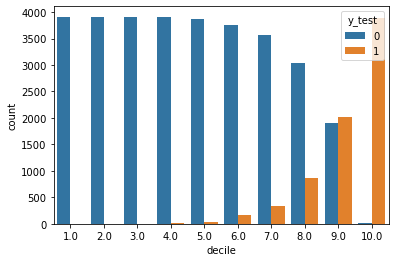

In [74]:
sns.countplot(x = 'decile', hue = 'y_test', data =X_test_res , dodge=True )